In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Given polynom
def P(x:float) -> float:
    return x**6 + 0.9*x**5 - 0.2*x**3 - 1.3*x**2 - 0.7*x + 0.1

def dP(x:float) -> float:
    return 6*x**5 + 0.9*5*x**4 - 0.6*x**2 - 2.6*x - 0.7

In [5]:
a, b = -1.5, 1.5
x_data = np.linspace(a, b, 10000)

[(-2.0, 2.0)]

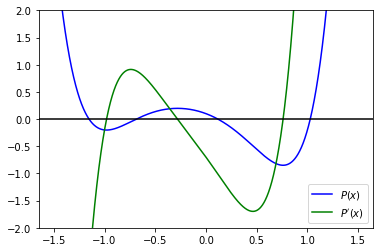

In [6]:
fig, axs = plt.subplots()

axs.plot(x_data, P(x_data), label="$P(x)$", color="blue")
axs.plot(x_data, dP(x_data), label="$P'(x)$", color="green")
axs.legend()
ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='k')
axs.set(ylim=(-2, 2))
#fig.savefig("2.1_plot.png", dpi=500)

In [7]:
#Вычислим максимальное и минимальное значение производной на отрезках локализации
x = [[-1.4, -1], [-0.9, -0.5], [0, 0.5], [0.8, 1.3]]
def max_min(d):
    x = np.linspace(d[0], d[1], 1000)
    y = [dP(i) for i in x]
    return max(y), min(y)

M_m = []
for i in x:
    M_m.append(max_min(i))
alpha = [2/(i[0] + i[1]) for i in M_m]
q = [np.abs((i[0] - i[1]) / (i[0] + i[1])) for i in M_m]
print(alpha)
print(q)

[-0.1490508442239818, 1.3725100516667588, -0.8340389228087154, 0.06518626486287579]
[0.9701898311552037, 0.2536976594061997, 0.41617275403389914, 0.9579366070092835]


In [10]:
def get_root(alpha, d):
    x = [(d[0] + d[1])/2]
    eps = 1e-8
    x.append(x[-1] - alpha*P(x[-1]))
    while np.abs(x[-1] - x[-2]) > eps:
        x.append(x[-1] - alpha*P(x[-1]))
    return x
res = [] #В этом массиве будут храниться корни всех этапов работы метода
for i in range(4):
    res.append(get_root(alpha[i], x[i]))
    print(len(res[-1]), res[-1][-1], P(res[-1][-1]))

29 -1.1526476860739139 3.2320309678590675e-08
12 -0.686541059047781 6.212199366029125e-10
10 0.11700620394113045 -3.6110692214208484e-10
22 1.0276492114149889 3.9607403162778e-08


In [11]:
for i in range(4):
    print("{7}-й: {8:.9} & $[{0}, {1}]$ & {2:.3} & {3:.3} & {4:.3} & {5:.3} & {6} \\\ \hline".format(
            x[i][0], x[i][1], M_m[i][0], M_m[i][1], alpha[i], q[i], len(res[i]), i+1, res[i][-1]))

1-й: -1.15264769 & $[-1.4, -1]$ & -0.2 & -13.2 & -0.149 & 0.97 & 29 \\ \hline
2-й: -0.686541059 & $[-0.9, -0.5]$ & 0.913 & 0.544 & 1.37 & 0.254 & 12 \\ \hline
3-й: 0.117006204 & $[0, 0.5]$ & -0.7 & -1.7 & -0.834 & 0.416 & 10 \\ \hline
4-й: 1.02764921 & $[0.8, 1.3]$ & 30.0 & 0.645 & 0.0652 & 0.958 & 22 \\ \hline
